# "Games"

**Project Description**

You work at "Streamchik," an online store that sells computer games worldwide. Historical data on game sales, user and expert ratings, genres, and platforms (e.g., Xbox or PlayStation) are available from open sources.

**Task**

It is necessary to identify patterns that determine the success of a game. This will allow you to bet on a potentially popular product and plan advertising campaigns.

**Data Description**

- **Name**: Game title
- **Platform**: Gaming platform
- **Year_of_Release**: Release year
- **Genre**: Game genre
- **NA_sales**: Sales in North America (millions of copies sold)
- **EU_sales**: Sales in Europe (millions of copies sold)
- **JP_sales**: Sales in Japan (millions of copies sold)
- **Other_sales**: Sales in other countries (millions of copies sold)
- **Critic_Score**: Critic score (maximum 100)
- **User_Score**: User score (maximum 10)
- **Rating**: Rating from the Entertainment Software Rating Board (ESRB). This association assigns age ratings to computer games.

## First Glance at the Data

Let's import the necessary libraries and display basic information.

In [435]:
from scipy import stats as st
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/games.csv')

print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Let's display information about missing values.

In [436]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Let's display the general description of the dataframe.

In [437]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Conclusion

There are missing values in some columns. We will remove them later.

There are also rows with zero sales in regions.

In the Rating column, there are values "tbd". We'll further process it.

## Data Preparation

Let's convert the columns Name, Platform, Genre, and Rating to lowercase.

In [438]:
df_lower = ['Name', 'Platform', 'Genre', 'Rating']

for i in df_lower:
    df[i] = df[i].str.lower()

Let's display rows with empty values in the Name column.

In [439]:
df.query('Name.isna() == True')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Let's delete these rows.

In [440]:
df = df.query('Name.isna() == False')

From the description of the table, we can see that the median of Year_of_Release is 2007. Let's replace missing values with this number, as there are not too many of them.

In [441]:
df['Year_of_Release'] = df['Year_of_Release'].fillna(2007)

Let's replace missing values in the Critic_Score column with -1, indicating that -1 represents missing values.

In [442]:
df['Critic_Score'] = df['Critic_Score'].fillna(-1)

In the User_Score column, there are values "tbd" - To Be Determined. Let's change all these values to -1.

In [443]:
df.loc[df['User_Score'] == 'tbd', 'User_Score'] = -1

Let's replace all missing values in the User_Score column with -1.

In [444]:
df['User_Score'] = df['User_Score'].fillna(-1)

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16713 non-null object
Year_of_Release    16713 non-null float64
Genre              16713 non-null object
NA_sales           16713 non-null float64
EU_sales           16713 non-null float64
JP_sales           16713 non-null float64
Other_sales        16713 non-null float64
Critic_Score       16713 non-null float64
User_Score         16713 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Let's replace all missing values in the Rating column with 'No info'.

In [446]:
df['Rating'] = df['Rating'].fillna('No info')

We've dealt with the missing values.

Let's convert the column names to lowercase.

In [447]:
df.columns = df.columns.str.lower()

Let's check for duplicates.

In [448]:
df.duplicated().sum()

0

There are no duplicates.

Let's change the data types.

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null object
rating             16713 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [450]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].astype(float)

Let's calculate the total sales in all regions.

In [451]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Conclusion

1. Changed data types.
2. Converted all data to lowercase.
3. Handled missing values.

## Exploratory Data Analysis

### Let's see how many games were released in different years.

Text(0.5, 1.0, 'График кол-ва релиза игр в период 1980 - 2016 гг')

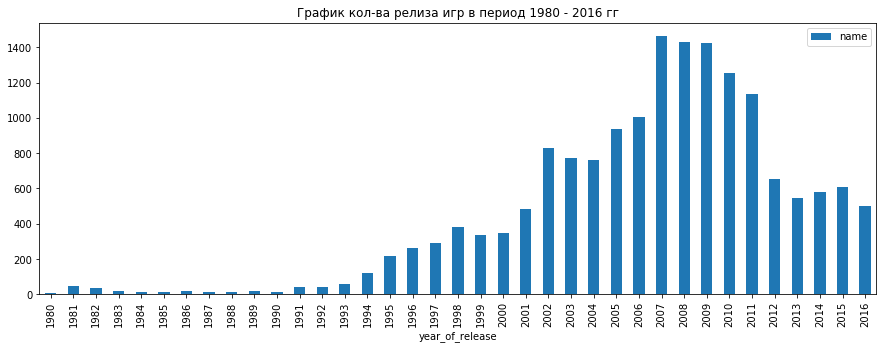

In [452]:
df_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
df_years.plot(kind='bar', x='year_of_release', figsize=(15, 5))
plt.title("График кол-ва релиза игр в период 1980 - 2016 гг")

Let's find the most popular platforms.

In [453]:
df_years_platform = df.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum').reset_index()
df_years_platform.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False).head(4)

,platform,total_sales
16,ps2,1255.77
28,x360,971.42
17,ps3,939.65
25,wii,907.51


In [454]:
top_platform = ['ps2', 'x360', 'ps3', 'wii']

In [455]:
df_years_platform_top = df_years_platform.query('platform in @top_platform')

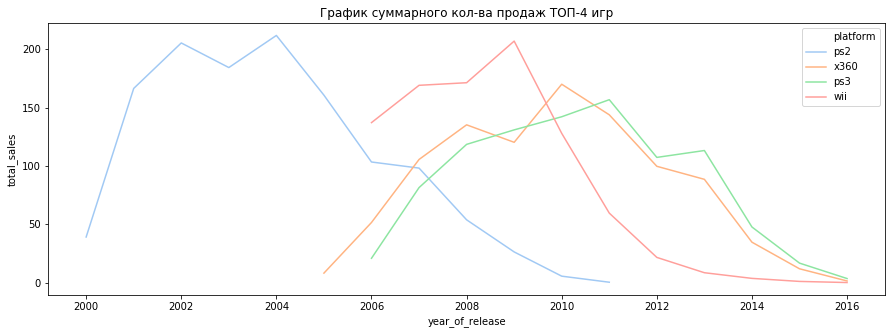

In [456]:
line,ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(x="year_of_release", y="total_sales", data=df_years_platform_top, palette="pastel", hue="platform")
plt.title('График суммарного кол-ва продаж ТОП-4 игр')
plt.show()

From 2000 to 2005, PS2 was in the lead, from 2005 to 2010 it was Wii, and from 2010 onwards, PS3 and X360 were approximately at the same level.

Let's plot a sales graph for each of the top 4 platforms.

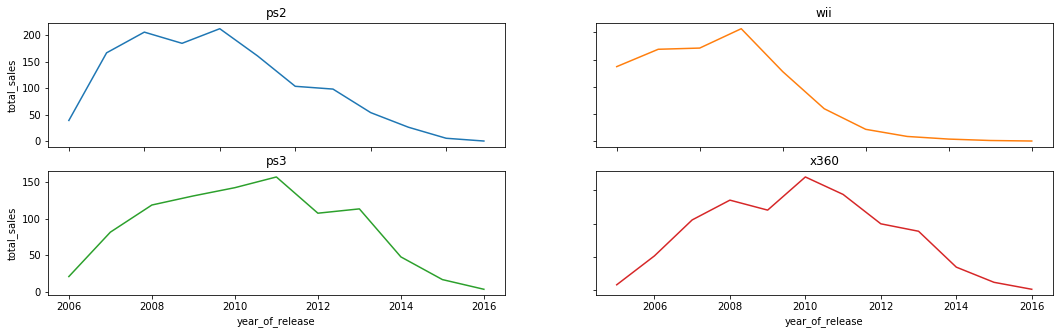

In [457]:
ps2 = df_years_platform_top.query('platform == "ps2"')
x360 = df_years_platform_top.query('platform == "x360"')
ps3 = df_years_platform_top.query('platform == "ps3"')
wii = df_years_platform_top.query('platform == "wii"')

fig, axs = plt.subplots(2, 2, figsize=(18, 5))
axs[0, 0].plot(ps2['year_of_release'], ps2['total_sales'])
axs[0, 0].set_title('ps2')
axs[0, 1].plot(wii['year_of_release'], wii['total_sales'], 'tab:orange')
axs[0, 1].set_title('wii')
axs[1, 0].plot(ps3['year_of_release'], ps3['total_sales'], 'tab:green')
axs[1, 0].set_title('ps3')
axs[1, 1].plot(x360['year_of_release'], x360['total_sales'], 'tab:red')
axs[1, 1].set_title('x360')

for ax in axs.flat:
    ax.set(xlabel='year_of_release', ylabel='total_sales')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Starting from 2013, sales on all platforms are declining.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'График итоговых прожаж для ТОП-4 платформы')

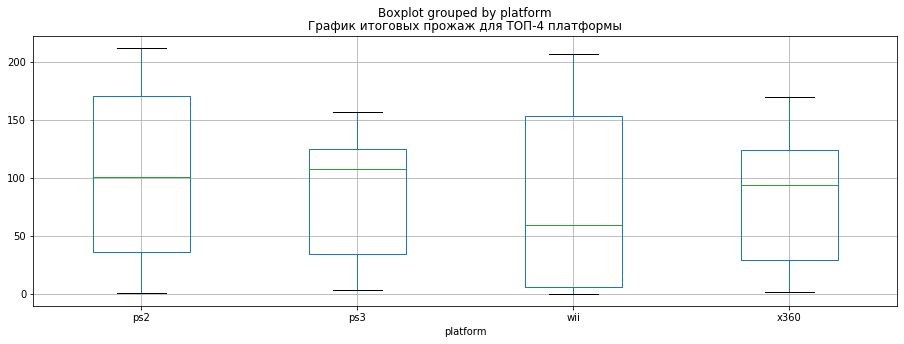

In [458]:
df_years_platform_top.boxplot('total_sales', by='platform', figsize=(15, 5))
plt.title('График итоговых прожаж для ТОП-4 платформы')

The graph displays the top 4 platforms. The platform with the highest median is PS3 and PS2. Wii is the platform with the highest maximum value among the platforms.

<b>Let's find the top platforms starting from 2014.</b>

For planning future advertising campaigns, we will rely on data from the last 3 years. I think this will be more accurate than simply relying on the previous year.

In [459]:
df_years_platform_2014 = df.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum').reset_index()
df_years_platform_2014 = df_years_platform_2015.query('year_of_release >= 2014')
df_years_platform_2014.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False).head(4)

,platform,total_sales
3,ps4,288.15
9,xone,140.36
0,3ds,86.68
2,ps3,68.18


Text(0.5, 1.0, 'График итоговых прожаж для ТОП-4 платформы за период 2014-2016 гг')

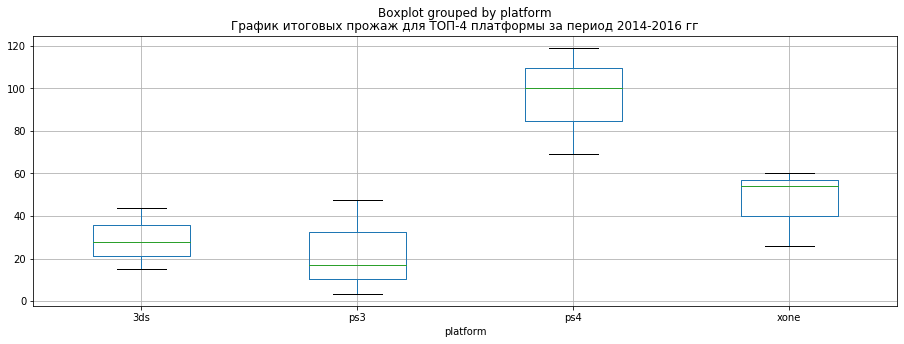

In [460]:
top_platform_2014 = ['ps4', 'xone', '3ds', 'ps3']
df_years_platform_2014 = df_years_platform_2014.query('platform in @top_platform_2014')

df_years_platform_2014.boxplot('total_sales', by='platform', figsize=(15, 5))
plt.title('График итоговых прожаж для ТОП-4 платформы за период 2014-2016 гг')

The number of games released for PS4 since 2014 significantly exceeds all other platforms. In second place for sales is XOne.

<b>Let's plot a scatter plot for the PS3 platform.</b>

In [461]:
df_ps3 = df.query('platform == "ps3"')

Text(0.5, 1.0, 'График зависимости итоговых продаж от оценки пользователей')

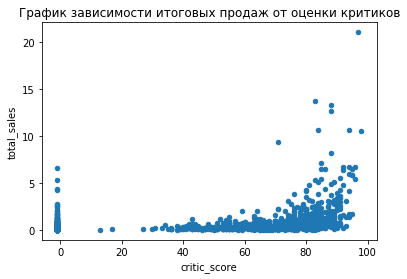

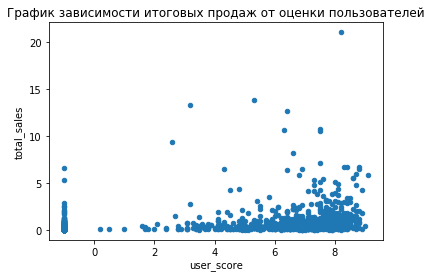

In [462]:
df_ps3.plot.scatter(x='critic_score', y='total_sales')
plt.title('График зависимости итоговых продаж от оценки критиков')
df_ps3.plot.scatter(x='user_score', y='total_sales')
plt.title('График зависимости итоговых продаж от оценки пользователей')

Regarding the PS3:

From the scatter plot, we can see that sales are strongly dependent on critic scores. Before a score of 70, there are no outliers. After a score of 80, large sales start to appear. That is, if a game's critic score is less than 80, there is a high chance that the game will not exceed 5 million in sales. The goal is to achieve a score of more than 80.

User scores are not as critical for sales. Of course, they influence sales, but outliers are more common with user scores. This means a game can achieve high sales even with an average user score. The chance is not high, but it exists.

In [463]:
df_ps3[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.823671,0.353793
user_score,0.823671,1.000000,0.272669
total_sales,0.353793,0.272669,1.000000


The dependency on critic scores is higher than on user scores, as I mentioned earlier.

<b>Let's plot a scatter plot for all platforms.</b>

Text(0.5, 1.0, 'График зависимости итоговых продаж от оценки пользователей')

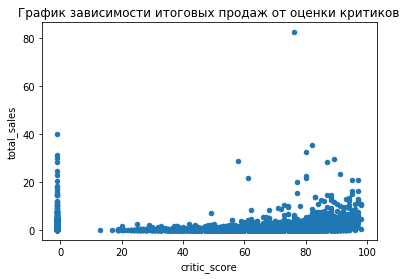

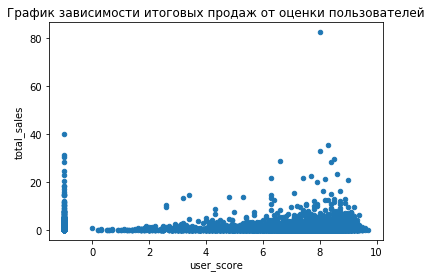

In [464]:
df.plot.scatter(x='critic_score', y='total_sales')
plt.title('График зависимости итоговых продаж от оценки критиков')
df.plot.scatter(x='user_score', y='total_sales')
plt.title('График зависимости итоговых продаж от оценки пользователей')

In [465]:
df[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.818959,0.148076
user_score,0.818959,1.000000,0.135123
total_sales,0.148076,0.135123,1.000000


The correlation shows that the dependence of total sales on critics is slightly higher than on users. However, both dependencies are quite weak.

Let's look at the distribution by genres.

In [466]:
df_genre = df.pivot_table(index=['year_of_release', 'genre'], values='total_sales', aggfunc='sum').reset_index()

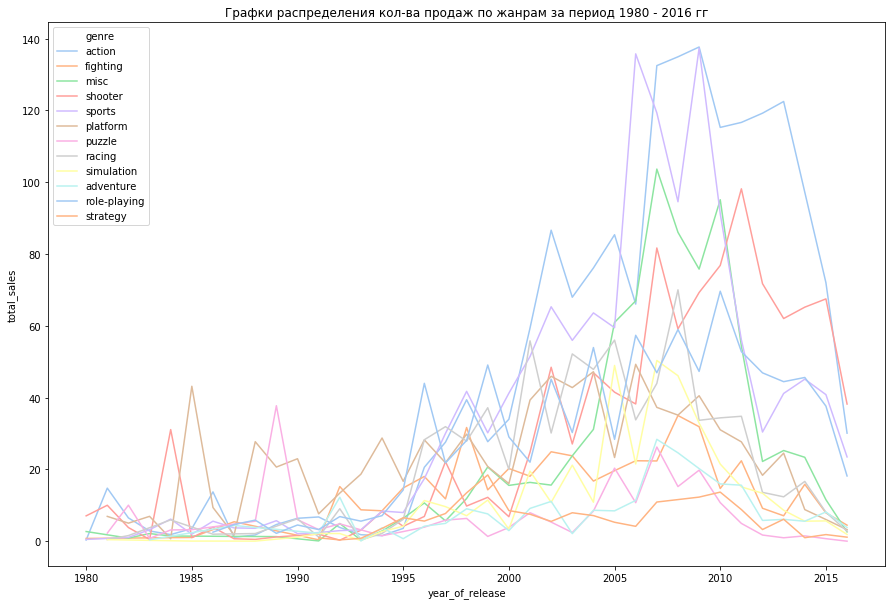

In [467]:
line,ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="year_of_release", y="total_sales", data=df_genre, palette="pastel", hue="genre")
plt.title('Графки распределения кол-ва продаж по жанрам за период 1980 - 2016 гг')
plt.show()


The leader in sales is the action genre, followed by sports and shooters. The strategy genre sells the worst of all. Surprisingly, in 1985, the most popular genre was strategy.

Text(0.5, 1.0, 'Суммарные продажи по жанрам')

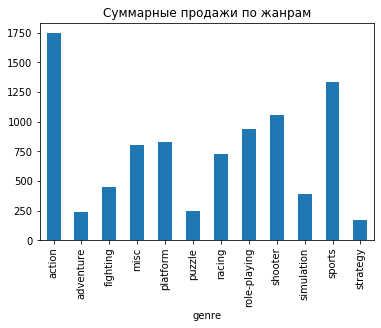

In [468]:
df_genre.groupby('genre')['total_sales'].sum().plot(kind='bar')
plt.title('Суммарные продажи по жанрам')

Action stands out significantly against other genres. This is all thanks to cyberpunk. Just kidding. Let's move on.

Text(0.5, 1.0, 'Средние продажи по жанрам')

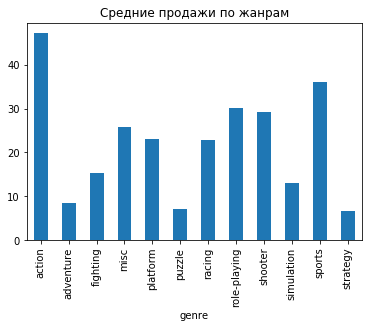

In [469]:
df_genre.groupby('genre')['total_sales'].mean().plot(kind='bar')
plt.title('Средние продажи по жанрам')

The average values ​​show the same picture as the total.

### Conclusion

From the graphs, we learned the most successful year for game sales, the most popular genre, and the dependency on critic and user scores.

## User Portrait for Each Region

<b>Top 5 Most Popular Platforms</b>

In [470]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

In [471]:
df_flatform_refion = df.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
df_flatform_refion['na_sales_%'] = df_flatform_refion['na_sales'] / df_flatform_refion['na_sales'].sum()
df_flatform_refion['eu_sales_%'] = df_flatform_refion['eu_sales'] / df_flatform_refion['eu_sales'].sum()
df_flatform_refion['jp_sales_%'] = df_flatform_refion['jp_sales'] / df_flatform_refion['jp_sales'].sum()

display(df_flatform_refion.sort_values('na_sales_%', ascending=False).head())
print()
display(df_flatform_refion.sort_values('eu_sales_%', ascending=False).head())
print()
display(df_flatform_refion.sort_values('jp_sales_%', ascending=False).head())

,platform,eu_sales,jp_sales,na_sales,na_sales_%,eu_sales_%,jp_sales_%
28,x360,270.76,12.43,602.47,0.136907,0.111693,0.009581
16,ps2,339.29,139.20,583.84,0.132674,0.139963,0.107296
25,wii,262.21,69.33,496.90,0.112917,0.108166,0.053440
17,ps3,330.29,80.19,393.49,0.089418,0.136250,0.061811
4,ds,188.89,175.57,382.40,0.086898,0.077920,0.135331


,platform,eu_sales,jp_sales,na_sales,na_sales_%,eu_sales_%,jp_sales_%
16,ps2,339.29,139.20,583.84,0.132674,0.139963,0.107296
17,ps3,330.29,80.19,393.49,0.089418,0.136250,0.061811
28,x360,270.76,12.43,602.47,0.136907,0.111693,0.009581
25,wii,262.21,69.33,496.90,0.112917,0.108166,0.053440
15,ps,213.61,139.82,336.52,0.076472,0.088118,0.107774


,platform,eu_sales,jp_sales,na_sales,na_sales_%,eu_sales_%,jp_sales_%
4,ds,188.89,175.57,382.40,0.086898,0.077920,0.135331
15,ps,213.61,139.82,336.52,0.076472,0.088118,0.107774
16,ps2,339.29,139.20,583.84,0.132674,0.139963,0.107296
23,snes,19.04,116.55,61.23,0.013914,0.007854,0.089838
2,3ds,61.48,100.67,83.49,0.018973,0.025362,0.077597


Among the top best, let's highlight the platform PS2, which is popular in all three regions.

<b>Top 5 Most Popular Genres</b>

In [472]:
df_genre_refion = df.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
df_genre_refion['na_sales_%'] = df_genre_refion['na_sales'] / df_genre_refion['na_sales'].sum()
df_genre_refion['eu_sales_%'] = df_genre_refion['eu_sales'] / df_genre_refion['eu_sales'].sum()
df_genre_refion['jp_sales_%'] = df_genre_refion['jp_sales'] / df_genre_refion['jp_sales'].sum()

display(df_genre_refion.sort_values('na_sales_%', ascending=False).head())
print()
display(df_genre_refion.sort_values('eu_sales_%', ascending=False).head())
print()
display(df_genre_refion.sort_values('jp_sales_%', ascending=False).head())

,genre,eu_sales,jp_sales,na_sales,na_sales_%,eu_sales_%,jp_sales_%
0,action,519.13,161.43,879.01,0.199749,0.214150,0.124432
10,sports,376.79,135.54,684.43,0.155532,0.155432,0.104475
8,shooter,317.34,38.76,592.24,0.134583,0.130908,0.029877
4,platform,200.35,130.83,445.50,0.101237,0.082648,0.100845
3,misc,212.74,108.11,407.27,0.092549,0.087759,0.083332


,genre,eu_sales,jp_sales,na_sales,na_sales_%,eu_sales_%,jp_sales_%
0,action,519.13,161.43,879.01,0.199749,0.214150,0.124432
10,sports,376.79,135.54,684.43,0.155532,0.155432,0.104475
8,shooter,317.34,38.76,592.24,0.134583,0.130908,0.029877
6,racing,236.51,56.71,359.35,0.081660,0.097564,0.043713
3,misc,212.74,108.11,407.27,0.092549,0.087759,0.083332


,genre,eu_sales,jp_sales,na_sales,na_sales_%,eu_sales_%,jp_sales_%
7,role-playing,188.71,355.41,330.81,0.075174,0.077846,0.273953
0,action,519.13,161.43,879.01,0.199749,0.214150,0.124432
10,sports,376.79,135.54,684.43,0.155532,0.155432,0.104475
4,platform,200.35,130.83,445.50,0.101237,0.082648,0.100845
3,misc,212.74,108.11,407.27,0.092549,0.087759,0.083332


In each region, the top genres of games are approximately the same.

Let's see if the ESRB rating affects the North American market.

Text(0.5, 1.0, 'График продаж по рейтингам ESRB в Северной Америке')

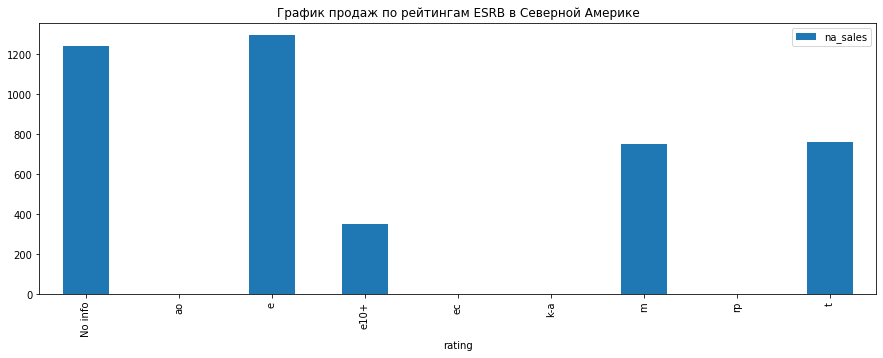

In [473]:
df_esrb_na = df.groupby('rating')['na_sales'].sum().reset_index()
df_esrb_na.plot(kind='bar', x='rating', figsize=(15,5))
plt.title('График продаж по рейтингам ESRB в Северной Америке')

The rating definitely has an impact.

The "E" rating (Everyone) is the most popular, which is expected given its broad appeal.

### Conclusion

We have identified the top platforms in each region and the top genres.

## Hypothesis Testing

### Hypothesis 1

<b>Null Hypothesis (H0): The average user rating of the Xbox One platform = the average user rating of the PC platform</b><br>
<b>Alternative Hypothesis (H1): The average user rating of the Xbox One platform ≠ the average user rating of the PC platform</b>

First, let's create a table without negative values, as we replaced missing values with -1.

In [474]:
df_h = df.query('user_score >= 0')

In [475]:
df_h_xone = df_h.query('platform == "xone"')

df_h_pc = df_h.query('platform == "pc"')

We are testing the hypothesis.

In [476]:
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    df_h_xone['user_score'], 
    df_h_pc['user_score'],
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.935072360183565e-06
Отвергаем нулевую гипотезу


The hypothesis was not confirmed. The average values of user ratings between Xbox One and PC are not equal.

### Hypothesis 2

<b>Null Hypothesis (H0): The average user rating of the Action genre = the average user rating of the Sports genre</b><br>
<b>Alternative Hypothesis (H1): The average user rating of the Action genre ≠ the average user rating of the Sports genre</b>

In [477]:
df_h_action = df_h.query('genre == "action"')
df_h_sports = df_h.query('genre == "sports"')

In [478]:
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    df_h_action['user_score'], 
    df_h_sports['user_score'],
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


The hypothesis was confirmed. The average values of user ratings between the Action and Sports genres are approximately equal.

### For the Final Task

In [479]:
# Comparing Regions
print('NA', df['na_sales'].sum())
print('EU', df['eu_sales'].sum())
print('JP', df['jp_sales'].sum())

NA 4400.570000000001
EU 2424.1400000000003
JP 1297.34


In [480]:
# Top Consoles
print('ТОП-3 платформ', df.groupby('platform')['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False).head(3))

ТОП-3 платформ    platform  total_sales
16      ps2      1255.77
28     x360       971.42
17      ps3       939.65


In [481]:
# Best Genres
print('ТОП-3 жанра', df.groupby('genre')['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False).head(3))

ТОП-3 жанра       genre  total_sales
0    action      1744.17
10   sports      1331.27
8   shooter      1052.45


### Conclusion

The hypothesis of equality of the average user rating between the Xbox One platform and PC was not confirmed.

The hypothesis of equality of the average user rating between the Action and Sports genres was confirmed.

## General Conclusion

In addressing the main question of the task, let's outline the key points:

1. The highest game sales are in North America.
2. The top gaming platforms are PS2, X360, and PS3.
3. The best-selling genres are action, sports, and shooter.

Additionally, the critic and user ratings significantly influence the success criterion.

These data points should be taken into account for the next advertising campaign.